In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from random import randint

In [3]:
df = pd.read_csv("data/data.csv", sep="|")
ts = list(map(lambda x: x/1000000, df[(df.identifier==36)&(df.hits>1000000)].sort_values(by="day")["hits"].to_list()))[50:]

In [4]:
def get_historical_gap(ts):
    hist_gap=0
    for idx1, elt1 in enumerate(ts):
        for idx2, elt2 in enumerate(ts[idx1+1:]):
            if elt2-elt1>hist_gap:
                hist_gap=elt2-elt1
    return hist_gap

In [5]:
get_historical_gap(ts)

7.191772

In [6]:
def get_historical_gap_optim(ts):
    hist_gap=0
    hist_min=ts[0]
    idx_max=[]
    idx_min=[]
    for idx, elt in enumerate(ts[1:]):
        if elt>ts[idx-1] and elt-hist_min>hist_gap:
            hist_gap = elt-hist_min
            idx_max.append(idx+1)
            continue
        elif elt<hist_min:
            hist_min=elt
            idx_min.append(idx+1)
    return idx_max[-1], max([idx for idx in idx_min if idx < max(idx_max)]), hist_gap

In [7]:
idx_max, idx_min, gap = get_historical_gap_optim(ts)
gap

7.191772

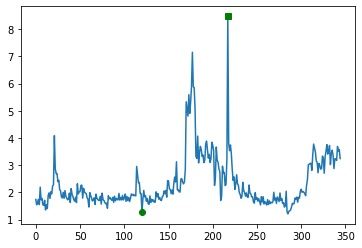

In [8]:
plt.plot(ts)
plt.plot(idx_min,ts[idx_min],'go') 
plt.plot(idx_max,ts[idx_max],'gs') 

Execution Time

In [9]:
%timeit get_historical_gap(ts)

2.66 ms ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%timeit get_historical_gap_optim(ts)

33.3 µs ± 415 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
